In [1]:
# Standard libraries
import math
import torch
import gpytorch
import numpy as np
from matplotlib import pyplot as plt

# Import custom modules
from function import FunctionUtils
from nd_model import ExactGPModel
from data import generate_nd_data
from normalize_data import normalize_data
from training import GPTrainer
from optimizer import OptimizerHandler
from visualizer import Visualizer
from main import MainRunner

In [ ]:
# --- Experiment Configuration ---
experiment_config = {
    "dims_to_run": [1, 2],  # Dimensions to test (e.g., 1D, 2D)
    
    # Global (default) settings - can be overridden per dimension
    "function_name": "rosenbrock",  # "rosenbrock", "ackley", "sphere", "rastrigin"
    "n_samples": 100,              # Default number of samples for data generation
    "optimizer_name": "LBFGS",     # "LBFGS" or "ADAM"
    "lr": 0.01,                    # Learning rate
    "train_iter": 150,             # Number of training iterations
    "noise_level": 1e-4,           # Noise level for data generation
    "domain_range": (-2, 2),       # Input domain for data generation e.g. (-2,2) or (-5,5) for Ackley
    "random_state_data": 42,       # Random seed for data generation (None for random)

    # Special n_samples handling (optional overrides)
    "n_samples_1d_viz": 70,       # Samples for 1D visualization (if different)
    "n_samples_high_dim_factor": 25, # Factor for n_samples in higher dims (e.g., 25 * d)

    # Dimension-specific overrides (optional)
    # Keys should be strings representing the dimension
    "dim_specific_configs": {
        "1": {
            "function_name": "sphere", # Example: Use sphere for 1D
            "n_samples": 60,
            "optimizer_name": "ADAM",
            "lr": 0.05,
            "train_iter": 100,
            "domain_range": (-3,3)
        },
        "2": {
            "function_name": "ackley", # Example: Use ackley for 2D
            "n_samples": 150,
            "optimizer_name": "LBFGS",
            "lr": 0.01,
            "train_iter": 200,
            "domain_range": (-5,5) # Ackley often tested on larger domain
        }
        # Add more dimension-specific configs if needed for 3D, 4D, 5D etc.
        # "3": { ... } 
    }
}


--- Training 1D model ---
1D Metrics:
  MSE  = 0.0003
  NMSE = nan
  MNLP = -3.2104


d:\bayesian_optimization_research\multi_dimension\training.py:78: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\ReduceOps.cpp:1839.)
  y_test_orig_var = torch.var(y_test_orig)


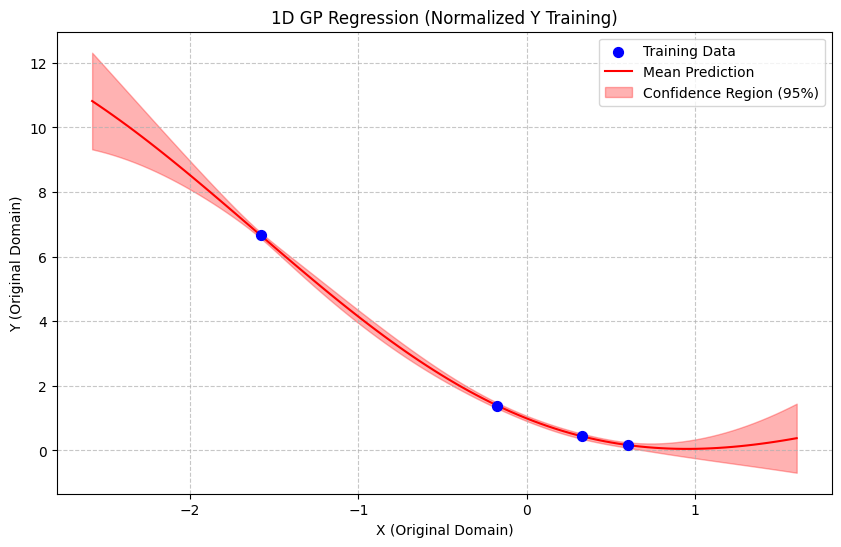


--- Training 2D model ---
2D Metrics:
  MSE  = 25.1325
  NMSE = 0.0000
  MNLP = -39.0614


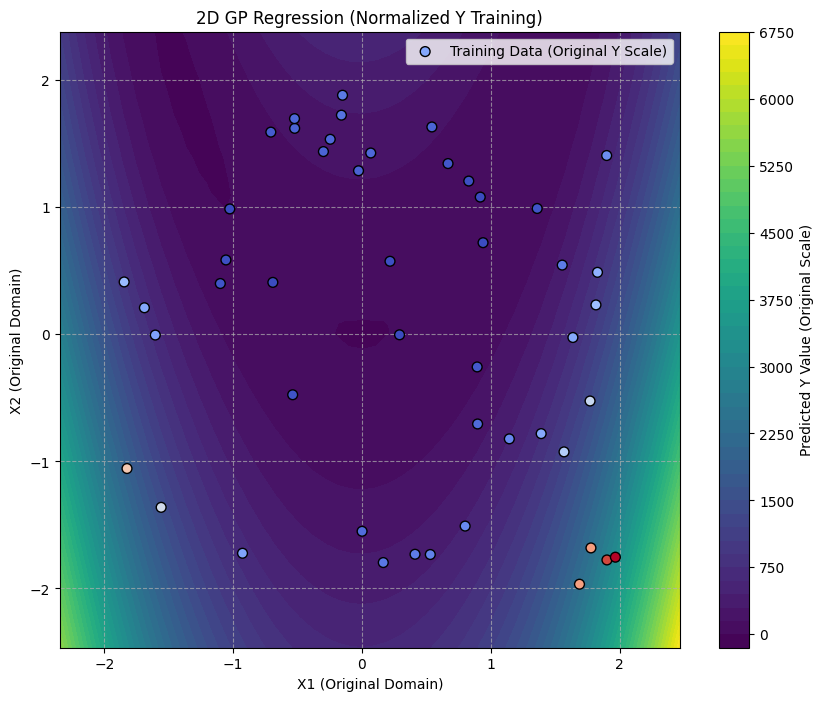


--- Training 3D model ---
3D Metrics:
  MSE  = 999.2867
  NMSE = 0.0024
  MNLP = -47.5752

--- Training 4D model ---
4D Metrics:
  MSE  = 11813.2852
  NMSE = 0.0129
  MNLP = -32.1862

--- Training 5D model ---
5D Metrics:
  MSE  = 91751.5234
  NMSE = 0.0645
  MNLP = -0.4502

=== Summary Metrics for 1D to 5D ===
1D -> MSE: 0.0003, NMSE: nan, MNLP: -3.2104
2D -> MSE: 25.1325, NMSE: 0.0000, MNLP: -39.0614
3D -> MSE: 999.2867, NMSE: 0.0024, MNLP: -47.5752
4D -> MSE: 11813.2852, NMSE: 0.0129, MNLP: -32.1862
5D -> MSE: 91751.5234, NMSE: 0.0645, MNLP: -0.4502


In [ ]:
# Main entry point example
if __name__ == "__main__": # This check is good practice but in notebooks, cells run sequentially
    # Create instances of required classes
    data_gen_func = generate_nd_data  # Function reference
    
    # Pass the likelihood CLASS and optimizer handler CLASS
    # Trainer and OptimizerHandler classes are passed, not instances yet
    trainer_cls = GPTrainer 
    optimizer_handler_cls = OptimizerHandler
    
    visualizer_instance = Visualizer()
    
    # Instantiate MainRunner with the configuration
    runner = MainRunner(
        data_generator=data_gen_func,
        normalizer=normalize_data,
        trainer_class=trainer_cls,
        optimizer_handler_class=optimizer_handler_cls,
        visualizer=visualizer_instance,
        config=experiment_config # Pass the config dictionary
    )
    
    # Run experiments based on the configuration
    results = runner.run_from_config()
    
    # Summary is printed within run_from_config, but you can add more here
    print("\n=== Experiment Run Complete ===")
